# 민원 빅데이터 키워드 트랜드 정보 분석(keyword: 장애인)

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use(['seaborn-whitegrid'])
plt.rc('font', family = 'Malgun Gothic')

import json
import requests
import pprint

### step1. 라이브러리 import 및 url입력

In [19]:
# url 입력
url = 'http://apis.data.go.kr/1140100/minAnalsInfoView3/minTimeSeriseView3?serviceKey=9dNbZ%2FxAAEdZTV3B%2BxJmwyqgjb4W5TrpKYIYzkFemFeFFseRZdnGbJSSHDf5cJpGZNdMLtIfjnAR%2B%2BBJKGvebg%3D%3D&target=dfpt&dateFrom=2018110100&dateTo=2021110123&period=DAILY&sortBy=NAME&sortOrder=false&dataType=json&searchword=%EC%9E%A5%EC%95%A0%EC%9D%B8'

In [20]:
# url 불러오기
response = requests.get(url)

In [21]:
# 데이터 값 출력해보기
contents = response.text

In [22]:
contents

'[{"hits":4,"label":"20181101","termQuery":"20181101d","prebRatio":"33.3"},{"hits":3,"label":"20181102","termQuery":"20181102d","prebRatio":"-25.0"},{"hits":0,"label":"20181103","termQuery":"20181103d","prebRatio":"-66.7"},{"hits":20,"label":"20181104","termQuery":"20181104d","prebRatio":""},{"hits":1,"label":"20181105","termQuery":"20181105d","prebRatio":"-95.0"},{"hits":2,"label":"20181106","termQuery":"20181106d","prebRatio":"100.0"},{"hits":3,"label":"20181107","termQuery":"20181107d","prebRatio":"50.0"},{"hits":0,"label":"20181108","termQuery":"20181108d","prebRatio":"-66.7"},{"hits":0,"label":"20181109","termQuery":"20181109d","prebRatio":""},{"hits":0,"label":"20181110","termQuery":"20181110d","prebRatio":""},{"hits":0,"label":"20181111","termQuery":"20181111d","prebRatio":""},{"hits":2,"label":"20181112","termQuery":"20181112d","prebRatio":""},{"hits":1,"label":"20181113","termQuery":"20181113d","prebRatio":"-50.0"},{"hits":1,"label":"20181114","termQuery":"20181114d","prebRati

In [25]:
# 데이터 결과값 예쁘게 출력해주는 코드
# pp = pprint.PrettyPrinter(indent=4) # indent: 들여쓰기 지정
# print(pp.pprint(contents))

'[{"hits":4,"label":"20181101","termQuery":"20181101d","prebRatio":"33.3"},{"hits":3,"label":"20181102","termQuery":"20181102d","prebRatio":"-25.0"},{"hits":0,"label":"20181103","termQuery":"20181103d","prebRatio":"-66.7"},{"hits":20,"label":"20181104","termQuery":"20181104d","prebRatio":""},{"hits":1,"label":"20181105","termQuery":"20181105d","prebRatio":"-95.0"},{"hits":2,"label":"20181106","termQuery":"20181106d","prebRatio":"100.0"},{"hits":3,"label":"20181107","termQuery":"20181107d","prebRatio":"50.0"},{"hits":0,"label":"20181108","termQuery":"20181108d","prebRatio":"-66.7"},{"hits":0,"label":"20181109","termQuery":"20181109d","prebRatio":""},{"hits":0,"label":"20181110","termQuery":"20181110d","prebRatio":""},{"hits":0,"label":"20181111","termQuery":"20181111d","prebRatio":""},{"hits":2,"label":"20181112","termQuery":"20181112d","prebRatio":""},{"hits":1,"label":"20181113","termQuery":"20181113d","prebRatio":"-50.0"},{"hits":1,"label":"20181114","termQuery":"20181114d","prebRati

### step2. 문자열을 json으로 변경하기

In [26]:
# 문자열을 json으로 변경
json_ob = json.loads(contents) # 문자열을 사전형(json)으로 전환

print(json_ob)
print(type(json_ob))

[{'hits': 4, 'label': '20181101', 'termQuery': '20181101d', 'prebRatio': '33.3'}, {'hits': 3, 'label': '20181102', 'termQuery': '20181102d', 'prebRatio': '-25.0'}, {'hits': 0, 'label': '20181103', 'termQuery': '20181103d', 'prebRatio': '-66.7'}, {'hits': 20, 'label': '20181104', 'termQuery': '20181104d', 'prebRatio': ''}, {'hits': 1, 'label': '20181105', 'termQuery': '20181105d', 'prebRatio': '-95.0'}, {'hits': 2, 'label': '20181106', 'termQuery': '20181106d', 'prebRatio': '100.0'}, {'hits': 3, 'label': '20181107', 'termQuery': '20181107d', 'prebRatio': '50.0'}, {'hits': 0, 'label': '20181108', 'termQuery': '20181108d', 'prebRatio': '-66.7'}, {'hits': 0, 'label': '20181109', 'termQuery': '20181109d', 'prebRatio': ''}, {'hits': 0, 'label': '20181110', 'termQuery': '20181110d', 'prebRatio': ''}, {'hits': 0, 'label': '20181111', 'termQuery': '20181111d', 'prebRatio': ''}, {'hits': 2, 'label': '20181112', 'termQuery': '20181112d', 'prebRatio': ''}, {'hits': 1, 'label': '20181113', 'termQue

### step3. Dataframe으로 변환하기

In [73]:
from pandas.io.json import json_normalize

# Dataframe으로 만들기
df = pd.json_normalize(json_ob)
df

,hits,label,termQuery,prebRatio
0,4,20181101,20181101d,33.3
1,3,20181102,20181102d,-25.0
2,0,20181103,20181103d,-66.7
3,20,20181104,20181104d,
4,1,20181105,20181105d,-95.0
...,...,...,...,...
1092,3,20211028,20211028d,-25.0
1093,3,20211029,20211029d,0.0
1094,4,20211030,20211030d,33.3
1095,2,20211031,20211031d,-50.0


---
더 간단한 방법은 아래 코드인데, 한 줄로 json 파일을 dataframe으로 변경할 수 있다.  
다만 아래 코드는 json 파일을 pc에 저장한 후에 사용하는 것이고 위의 코드는 프로그램 내에서 api 정보를 불러온다는 것에 차이가 있다.

In [11]:
df = pd.read_json('장애인 민원 키워드 트랜드 정보.json')

---

### step4. 데이터 전처리

In [12]:
df.drop(columns='termQuery', inplace=True)
df.rename(columns={'hits': '민원건수', 
                    'label': '날짜',
                    'prebRatio': '이전 건수 대비 증가율'}, inplace=True)
df

,민원건수,날짜,이전 건수 대비 증가율
0,4,20181101,33.3
1,3,20181102,-25.0
2,0,20181103,-66.7
3,20,20181104,
4,1,20181105,-95.0
...,...,...,...
1092,3,20211028,-25.0
1093,3,20211029,0.0
1094,4,20211030,33.3
1095,2,20211031,-50.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   민원건수          1097 non-null   int64 
 1   날짜            1097 non-null   int64 
 2   이전 건수 대비 증가율  1097 non-null   object
dtypes: int64(2), object(1)
memory usage: 25.8+ KB


In [14]:
df.isnull().sum()

민원건수            0
날짜              0
이전 건수 대비 증가율    0
dtype: int64

In [15]:
# 이전 건수 대비 증가율 변수 형변환
df['이전 건수 대비 증가율'] = pd.to_numeric(df['이전 건수 대비 증가율'])

In [20]:
# 날짜 변수 타입 전처리

def date_function(x):
    result = str(x)
    return result[0:4] +'-' + result[4:6] + '-' + result[6:8]

df['날짜'] = df['날짜'].apply(date_function)
df['날짜'] = pd.to_datetime(df['날짜'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   민원건수          1097 non-null   int64         
 1   날짜            1097 non-null   datetime64[ns]
 2   이전 건수 대비 증가율  744 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 25.8 KB


In [49]:
df.head()

,민원건수,날짜,이전 건수 대비 증가율
0,4,2018-11-01,33.3
1,3,2018-11-02,-25.0
2,0,2018-11-03,-66.7
3,20,2018-11-04,NaN
4,1,2018-11-05,-95.0


### step5. 데이터 시각화

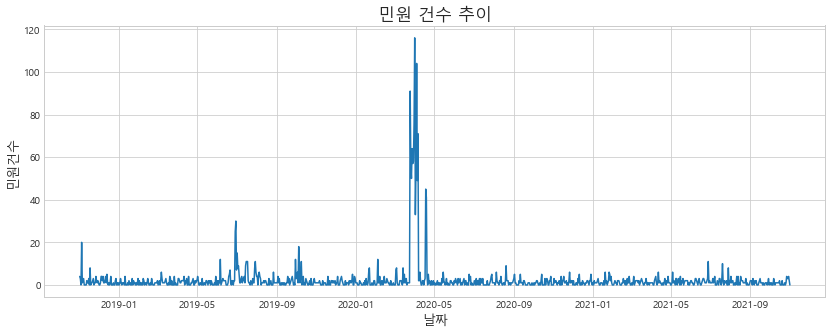

In [66]:
# 날짜별 민원 건수 추이
plt.figure(figsize=(14,5))
sns.lineplot(data = df, x = '날짜', y='민원건수')
plt.title('민원 건수 추이', fontsize=17)
plt.xlabel('날짜', fontsize = 13)
plt.ylabel('민원건수', fontsize = 13)
plt.show()

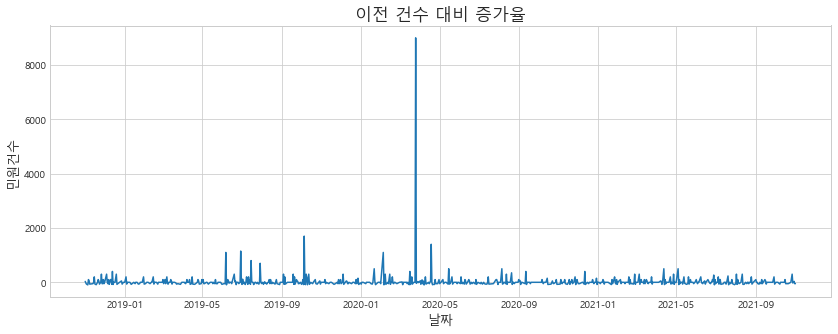

In [69]:
# 날짜별 이전 건수 대비 증가율
plt.figure(figsize=(14,5))
sns.lineplot(data = df, x = '날짜', y='이전 건수 대비 증가율')
plt.title('이전 건수 대비 증가율', fontsize=17)
plt.xlabel('날짜', fontsize = 13)
plt.ylabel('민원건수', fontsize = 13)
plt.show()

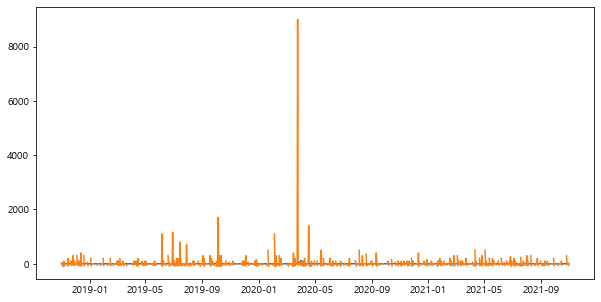

In [47]:
# 한 frame에 그리기
plt.figure(figsize=(10,5))
plt.plot(df['날짜'], df['민원건수'], df['날짜'], df['이전 건수 대비 증가율'])
plt.show()

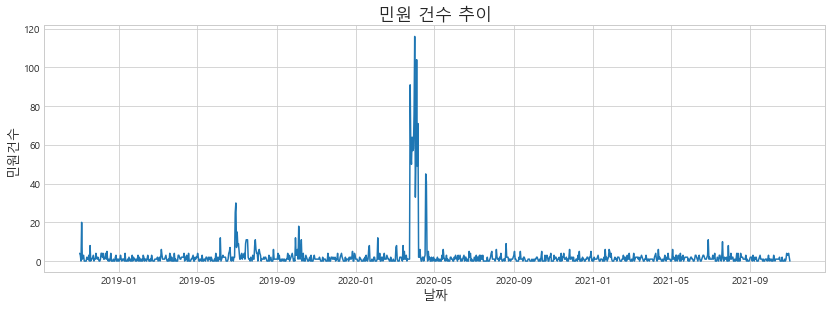

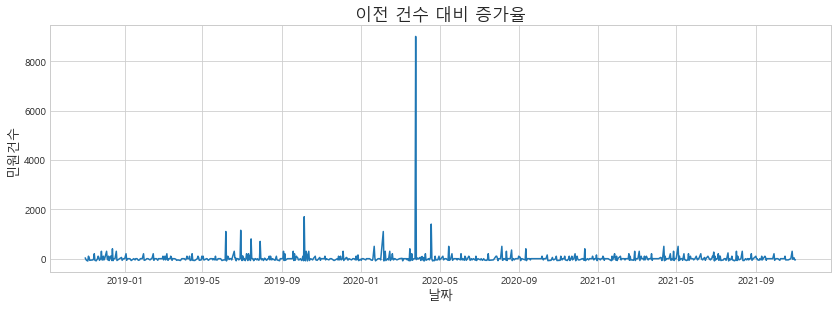

<Figure size 432x288 with 0 Axes>

In [91]:
# subplot 생성

plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
sns.lineplot(data = df, x = '날짜', y='민원건수')
plt.title('민원 건수 추이', fontsize=17)
plt.xlabel('날짜', fontsize = 13)
plt.ylabel('민원건수', fontsize = 13)
plt.show()


plt.figure(figsize=(14,10))
plt.subplot(2,1,2)
sns.lineplot(data = df, x = '날짜', y='이전 건수 대비 증가율')
plt.title('이전 건수 대비 증가율', fontsize=17)
plt.xlabel('날짜', fontsize = 13)
plt.ylabel('민원건수', fontsize = 13)
plt.show()

plt.tight_layout()
plt.show()